<a href="https://colab.research.google.com/github/kcarnold/cs344/blob/main/src/Sample_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try: import fastbook
except ImportError: import subprocess; subprocess.run(['pip','install','-Uq','fastbook']) 

In [2]:
from fastai.vision.widgets import *
from fastai.vision.all import *

In [3]:
import json
import os

In [4]:
path = untar_data('https://ds1.cs.calvin.edu/LkctzfaWUcJhWePeaqOv/subsets/yelp_photos_subset023.tgz')

In [5]:
data = []
my_dir = path / 'photos'

In [6]:
with open(path / 'photos.json') as f:
    for line in f:
        temp = json.loads(line)
        if(temp["label"] == "inside" or temp["label"] == "outside"):
            data.append(temp)           
os.chdir(path / 'photos')
for file in os.listdir("."):
    #check file's label
    #find file in data based on name
    found = False
    for i in data:
        if((i["photo_id"] +".jpg") == file):
            os.rename(file,(i["label"]+file))
            found = True
            break
    if(found == False):
        os.remove(file)  

In [7]:
def is_inside(x): # creates a function for whether the image is inside
  if x[0:6] == "inside":
    return 'inside'
  else:
    return 'outside'

In [8]:
dls = ImageDataLoaders.from_name_func(
    path=my_dir, fnames=get_image_files(my_dir), valid_pct=0.2, seed=25,
    label_func=is_inside, item_tfms=Resize(400))

In [9]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [10]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.847394,0.755682,0.276471,00:14


epoch,train_loss,valid_loss,error_rate,time
0,0.369090,0.430550,0.082353,00:16


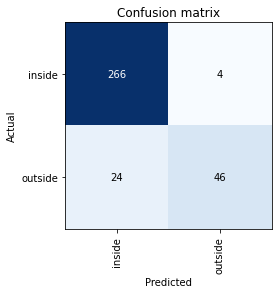

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

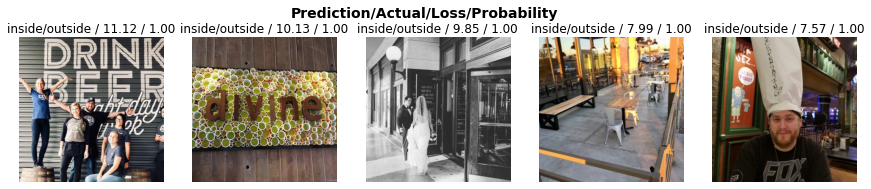

In [12]:
interp.plot_top_losses(5, nrows=1)

## Evaluation
After a few tweaks, my model ended up being pretty good. The error rate ended up being 7.6%. Based on the confusion matrix, my model misidentified 1 outside pictures and 8 inside pictures. The plot_top_losses() show the five pictures that my model most confidently misidentified.

In order to improve this model, I would want more data or I could also potentially add more layers to the architecture.